## Nathaniel Jones
#### STAT 4490 Project: Two Layer Neural Network
#### Spring 2021

# Two-layer NN class object

In [2]:
class MultiLayer_Perceptron:
    import numpy as np
    from sklearn.utils import shuffle
    import seaborn as sns
    from matplotlib import pyplot as plt

    
    def __init__(stuff, input_nodes, output_nodes, hidden_nodes=None,hidden_nodes2=None):  # Other parameters related 
        stuff.in_nodes = input_nodes                                                       # to modeling are in the fit
        stuff.out_nodes = output_nodes                                                     # method.
        stuff.hid_nodes = hidden_nodes
        stuff.hid_nodes2 = hidden_nodes2
                
        if stuff.hid_nodes == None:         # IF the first hidden node parameter is None, THEN continue to line 15. ELSE line 28.
            if stuff.hid_nodes2 == None:    # IF the second hidden node parameter is None, THEN continue to line 16. ELSE line 20.
                stuff.layrs = 0  
                stuff.W_hid2out = stuff.np.random.uniform(-1,1,
                                                         stuff.out_nodes*(len(stuff.in_nodes.T)+1)
                                                        ).reshape((len(stuff.in_nodes.T)+1),stuff.out_nodes)
            elif stuff.hid_nodes2 != None:  # IF the second hidden node parameter is NOT None, THEN continue to line 21.
                stuff.layrs = 1
                stuff.W_hid2hid = stuff.np.random.uniform(-1,1,
                                                          stuff.hid_nodes2*(len(stuff.in_nodes.T)+1)
                                                         ).reshape(len(stuff.in_nodes.T)+1,stuff.hid_nodes2)
                stuff.W_hid2out = stuff.np.random.uniform(-1,1,
                                                          stuff.out_nodes*(stuff.hid_nodes2+1)
                                                         ).reshape((stuff.hid_nodes2+1),stuff.out_nodes)
        if stuff.hid_nodes != None:         # IF the first hidden node parameter is NOT None, THEN continue to line 29.
            if stuff.hid_nodes2 != None:    # IF the second hidden node parameter is NOT None, THEN continue to line 30. ELSE line 40.
                stuff.layrs = 2
                stuff.W_in2hid = stuff.np.random.uniform(-1,1,
                                                         stuff.hid_nodes*(len(stuff.in_nodes.T)+1)
                                                        ).reshape((len(stuff.in_nodes.T)+1),stuff.hid_nodes)
                stuff.W_hid2hid = stuff.np.random.uniform(-1,1,
                                                          stuff.hid_nodes2*(stuff.hid_nodes+1)
                                                         ).reshape((stuff.hid_nodes+1),stuff.hid_nodes2)
                stuff.W_hid2out = stuff.np.random.uniform(-1,1,
                                                          stuff.out_nodes*(stuff.hid_nodes2+1)
                                                         ).reshape((stuff.hid_nodes2+1),stuff.out_nodes)
            elif stuff.hid_nodes2 == None:  # IF the first hidden node parameter is None, THEN continue to line 41.
                stuff.layrs = 1  
                stuff.W_hid2hid = stuff.np.random.uniform(-1,1,
                                                          stuff.hid_nodes*(len(stuff.in_nodes.T)+1)
                                                         ).reshape(len(stuff.in_nodes.T)+1,stuff.hid_nodes)
                stuff.W_hid2out = stuff.np.random.uniform(-1,1,
                                                          stuff.out_nodes*(stuff.hid_nodes+1)
                                                         ).reshape((stuff.hid_nodes+1),stuff.out_nodes)
    
#/* ------------------------------------------------------------------------------------------------------------------------ */    
    def addBias(stuff,xs):
        return stuff.np.concatenate((np.ones(len(xs)).reshape(-1,1), xs), axis=1)
        
    def sigmoid(stuff,nput):
        return (1/(1+(stuff.np.exp(-nput))))
    
    def piece_of(stuff,obj):
        return obj*(1-obj)
    
    def _nextBatch2(stuff, y):
        from sklearn.utils import shuffle
        X, y = shuffle(stuff.in_nodes, y, random_state=None)
        for i in stuff.np.arange(0, X.shape[0], stuff.btch_sze):
            yield (X[i:i + stuff.btch_sze], y[i:i + stuff.btch_sze]) 

    def get_numOF_layers(stuff,p=0):
        stuff.get_weights(p)
        return stuff.layrs
    
#/* ------------------------------------------------------------------------------------------------------------------------ */         
#      METHOD: score 
#/* ------------------------------------------------------------------------------------------------------------------------ */       
    def score(stuff,Y,X):
        Y = Y.reshape(-1,1)
        print("\n   Error:     ",round(stuff.np.sum((Y-stuff.feedforward(X))**2),5))
        print("Accuracy:       ",round(1-stuff.np.mean(abs(stuff.np.round(stuff.feedforward(X)-Y))),5)*100)
        
#/* ------------------------------------------------------------------------------------------------------------------------ */        
#      METHOD: Feedforward & Backpropagation
#/* ------------------------------------------------------------------------------------------------------------------------ */    
    def feedforward(stuff,xs):

        if stuff.layrs == 0:
            stuff.Yhat = stuff.sigmoid(stuff.np.matmul(stuff.addBias(xs),stuff.W_hid2out))       # hidden layer to output        
        if stuff.layrs == 1:
            stuff.Y1 = stuff.sigmoid(stuff.np.matmul(stuff.addBias(xs),stuff.W_hid2hid))         # hidden layer to hidden layer
            stuff.Yhat = stuff.sigmoid(stuff.np.matmul(stuff.addBias(stuff.Y1),stuff.W_hid2out)) # hidden layer to output
        if stuff.layrs == 2:          
            stuff.Y2 = stuff.sigmoid(stuff.np.matmul(stuff.addBias(xs),stuff.W_in2hid))          # input to hidden layer
            stuff.Y1 = stuff.sigmoid(stuff.np.matmul(stuff.addBias(stuff.Y2),stuff.W_hid2hid))   # hidden layer to hidden layer
            stuff.Yhat = stuff.sigmoid(stuff.np.matmul(stuff.addBias(stuff.Y1),stuff.W_hid2out)) # hidden layer to output
        return stuff.Yhat
    
    def backprop(stuff,guess,actual,xs):
        
        ERR_deltaG = (guess - actual)*guess*(1-guess)                                           # Compute the initial error
        
# FOR zero layer
        if stuff.layrs == 0:
          # WEIGHT UPDATE: output to data layer
            deltaW_xs = 2*(stuff.np.matmul(ERR_deltaG.T,stuff.addBias(xs)))                     # Compute the gradient
            stuff.W_hid2out = stuff.W_hid2out - deltaW_xs.T*stuff.learning_rate                 # Update the weights: hid2out     
        
# FOR one layer
        if stuff.layrs == 1:
          # WEIGHT UPDATE: output to hidden layer
            deltaW_Y1 = 2*(stuff.np.matmul(ERR_deltaG.T,stuff.addBias(stuff.Y1)))               # Compute the gradient
            stuff.W_hid2out = stuff.W_hid2out - deltaW_Y1.T*stuff.learning_rate                 # Update the weights: hid2out     
            hodl = (stuff.np.matmul(ERR_deltaG,stuff.W_hid2out[1:].T))*stuff.piece_of(stuff.Y1) # Compute link: _hid2out

          # WEIGHT UPDATE: hidden layer to data layer
            deltaW_xs = (stuff.np.matmul(hodl.T,stuff.addBias(xs)))                             # Compute the gradient
            stuff.W_hid2hid = stuff.W_hid2hid - deltaW_xs.T*stuff.learning_rate                 # Update the weights: hid2hid
        
# FOR two layer
        if stuff.layrs == 2:
          # WEIGHT UPDATE: output to hidden layer
            deltaW_Y1 = 2*(stuff.np.matmul(ERR_deltaG.T,stuff.addBias(stuff.Y1)))               # Compute the gradient
            stuff.W_hid2out = stuff.W_hid2out - deltaW_Y1.T*stuff.learning_rate                 # Update the weights: hid2out     
            hodl = (stuff.np.matmul(ERR_deltaG,stuff.W_hid2out[1:].T))*stuff.piece_of(stuff.Y1) # Compute link: _hid2out
    
          # WEIGHT UPDATE: hidden layer to hidden layer
            deltaW_Y2 = (stuff.np.matmul(hodl.T,stuff.addBias(stuff.Y2)))                       # Compute the gradient
            stuff.W_hid2hid = stuff.W_hid2hid - deltaW_Y2.T*stuff.learning_rate                 # Update the weights: hid2hid
            hodl = (stuff.np.matmul(hodl,stuff.W_hid2hid[1:].T))*stuff.piece_of(stuff.Y2)       # Compute link: _hid2hid
       
          # WEIGHT UPDATE: hidden layer to data layer
            deltaW_xs = (stuff.np.matmul(hodl.T,stuff.addBias(xs)))                             # Compute the gradient
            stuff.W_in2hid = stuff.W_in2hid - deltaW_xs.T*stuff.learning_rate                   # Update the weights: in2hid

#/* ------------------------------------------------------------------------------------------------------------------------ */         
#      METHOD: Predict 
#/* ------------------------------------------------------------------------------------------------------------------------ */       
    def predict(stuff,xs):
        return stuff.feedforward(xs)
    
#/* ------------------------------------------------------------------------------------------------------------------------ */         
#      METHOD: save & get weights 
#/* ------------------------------------------------------------------------------------------------------------------------ */       
    def get_weights(stuff,prnt=0):
        if stuff.layrs == 0:
            if prnt == 1:
                print("W_hid2out:\n\n\n",stuff.W_hid2out)
            return stuff.W_hid2out
        elif stuff.layrs == 1:
            if prnt == 1:
                print("W_hid2hid:\n\n\n",stuff.W_hid2hid,
                      "\n\n\n\nW_hid2out:\n\n\n",stuff.W_hid2out)        
            return stuff.W_hid2hid, stuff.W_hid2out
        elif stuff.layrs == 2:
            if prnt == 1:
                print("W_in2hid:\n\n\n",stuff.W_in2hid,
                      "\n\n\n\nW_hid2hid:\n\n\n",stuff.W_hid2hid,
                      "\n\n\n\nW_hid2out:\n\n\n",stuff.W_hid2out)        
            return stuff.W_in2hid, stuff.W_hid2hid, stuff.W_hid2out
        
    def save_the_weight(stuff):
        stuff.np.savetxt('current_weights_in2hid.csv', stuff.W_in2hid, delimiter=',')
        stuff.np.savetxt('current_weights_hid2hid.csv', stuff.W_hid2hid, delimiter=',')
        stuff.np.savetxt('current_weights_hid2out.csv', stuff.W_hid2out, delimiter=',')
        return print("weights are saved",stuff.get_weights())    

#/* ------------------------------------------------------------------------------------------------------------------------ */         
#      METHOD: fit 
#/* ------------------------------------------------------------------------------------------------------------------------ */       
    def fit(stuff,Y,lr=.01,ep_ch=10,batch_size=8,prt_frq=1):
        stuff.learning_rate = lr
        stuff.btch_sze = batch_size
        stuff.print_freq = prt_frq
        stuff.ep_ch = ep_ch
        Y = Y.reshape(-1,1)
        
        for epoch in range(int(ep_ch/prt_frq)):
            for prt_freq in range(prt_frq):
                for x_batch, y_batch in stuff._nextBatch2(Y):
                    stuff.backprop(stuff.feedforward(x_batch),y_batch,x_batch)
            stuff.score(Y,stuff.in_nodes)

# READ in data for ata and ata.T

In [6]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csc_matrix
from scipy.special import expit
from scipy import sparse
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from copy import copy
from sklearn import svm
import time
from matplotlib import pyplot as plt

mem = Memory("./mycache")   # cach Benefits for computationally expensive process


# Functions
def get_txt(datafile):  # read txt file
    data = load_svmlight_file(datafile)
    return data[0], data[1]

def t_pose(column):  # transpose data
    t_col = np.einsum('ij->ji',column)
    return t_col

da_ta = get_txt('a1a.txt')

The_X = da_ta[0]
The_Z = da_ta[1]

#print(":: --- The_X --- ::","\n","\n",The_X,"\nThe Shape is: ",The_X.shape,"\n",":: --- The_Z --- ::",
#      "\n","\n",The_Z,"\nThe Shape is: ",The_Z.shape)

# From the print statement above we can see that The_X is not usable. .todense() unpacks data like the data in The_X

train = pd.DataFrame(The_X.todense())
#print(train,"\n")

# Add a column of zeros
features = train.shape[1]
#print(features,"\n")
train[features] = 0
#print(train,"\n")

min_Z = min(The_Z)
max_Z = max(The_Z)
y_train = (The_Z - min_Z)/(max_Z - min_Z)
#print(min_Z,"\n","\n",max_Z,"\n","\n",y)

da_ta2 = get_txt('a1a.t')

The_T = da_ta2[0]
The_U = da_ta2[1]

The_T = pd.DataFrame(The_T.todense())

# Add a column of zeros
The_T[features] = 0
test = The_T.iloc[:,0:(features+1)]

min_U = min(The_U)
max_U = max(The_U)
y_test = (The_U-min_U)/(max_U-min_U)

### Create 2-L NN architecture

In [7]:
MLP_TWOLAYER = MultiLayer_Perceptron(train,1,70,50)
MLP_ZEROLAYER = MultiLayer_Perceptron(train,1)
MLP_ONELAYER_A = MultiLayer_Perceptron(train,1,70)
MLP_ONELAYER_B = MultiLayer_Perceptron(train,1,hidden_nodes2=50)

In [10]:
# Input of 1 will return a printout of the weights and the number of layers.
# Input of 0 will NOT return a printout of the weights but will return the number of layers.

#print(MLP.dome(1))
#print(MLP2.dome(1))
#print(MLP3.dome(1))
#print(MLP4.dome(1))

print(MLP_TWOLAYER.get_numOF_layers(0))
print(MLP_ZEROLAYER.get_numOF_layers(0))
print(MLP_ONELAYER_A.get_numOF_layers(0))
print(MLP_ONELAYER_B.get_numOF_layers(0))

2
0
1
1


#### METHOD: fit(target, learning rate, epoch, batch size, print frequency)

In [11]:
MLP_TWOLAYER.fit(y_train,lr=.1,ep_ch=100,batch_size=8,prt_frq=1)


   Error:      29.88834
Accuracy:        97.944

   Error:      28.06641
Accuracy:        97.944

   Error:      27.8042
Accuracy:        97.944

   Error:      27.65491
Accuracy:        97.944

   Error:      28.95502
Accuracy:        97.944

   Error:      28.97779
Accuracy:        97.944

   Error:      28.62848
Accuracy:        97.944

   Error:      27.66569
Accuracy:        97.944

   Error:      29.06767
Accuracy:        97.944

   Error:      28.15169
Accuracy:        97.944

   Error:      31.24438
Accuracy:        97.882

   Error:      29.02287
Accuracy:        97.944

   Error:      28.9746
Accuracy:        97.882

   Error:      29.59096
Accuracy:        97.944

   Error:      27.70097
Accuracy:        97.944

   Error:      27.74958
Accuracy:        97.944

   Error:      32.87167
Accuracy:        97.695

   Error:      28.18966
Accuracy:        97.944

   Error:      30.55975
Accuracy:        97.882

   Error:      29.6868
Accuracy:        97.757

   Error:      27.6288

#### METHOD: predict(inputs)

In [12]:
print(":: TRAINING prediction ::\n\n",MLP_TWOLAYER.predict(train)) # training prediction
print("\n:: TESTING prediction ::\n\n",MLP_TWOLAYER.predict(test)) # testing prediction

:: TRAINING prediction ::

 [[1.34282559e-07]
 [1.50794674e-05]
 [1.37869391e-03]
 ...
 [1.10965085e-12]
 [2.68246153e-08]
 [4.92867372e-07]]

:: TESTING prediction ::

 [[8.98171321e-01]
 [3.15554024e-11]
 [8.00099701e-02]
 ...
 [5.57081493e-06]
 [5.53976149e-11]
 [3.45140563e-01]]


#### METHOD: score(target, inputs)

In [13]:
print(":: TRAINING ::")
MLP_TWOLAYER.score(y_train,train) # training score
print("\n:: TESTING ::")
MLP_TWOLAYER.score(y_test,test)   # testing score

:: TRAINING ::

   Error:      27.57619
Accuracy:        97.944

:: TESTING ::

   Error:      5381.08488
Accuracy:        80.50500000000001


#### METHOD: get_weights()

This method returns a tuple with three objects in it

In [14]:
wei2_TWOLAYER, wei1_TWOLAYER, wei0_TWOLAYER = MLP_TWOLAYER.get_weights()

In [15]:
#print(wei2_TWOLAYER)
wei2_TWOLAYER[1:].shape

(120, 70)

In [16]:
#print(wei1_TWOLAYER)
wei1_TWOLAYER[1:].shape

(70, 50)

In [ ]:
#print(wei0_TWOLAYER)
wei0_TWOLAYER[1:].shape

(50, 1)

## Other models with varying layers and hyperparameters

In [17]:
MLP_ZEROLAYER.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP_ZEROLAYER.score(y_test,test)   # testing score


   Error:      207.2013
Accuracy:        80.872

   Error:      195.46356
Accuracy:        81.994

   Error:      172.25543
Accuracy:        84.798

   Error:      175.97128
Accuracy:        83.92500000000001

   Error:      166.8806
Accuracy:        85.358

   Error:      167.53915
Accuracy:        85.047

   Error:      169.27632
Accuracy:        85.358

   Error:      167.67829
Accuracy:        85.17099999999999

   Error:      169.63339
Accuracy:        84.922

   Error:      166.3766
Accuracy:        85.17099999999999

:: TESTING ::

   Error:      3578.00626
Accuracy:        83.431


In [18]:
MLP2_ZEROLAYER = MultiLayer_Perceptron(train,1)
MLP2_ZEROLAYER.fit(y_train,lr=.01,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP2_ZEROLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: learning rate changed to .01 from .1")


   Error:      284.99158
Accuracy:        75.016

   Error:      252.77103
Accuracy:        77.757

   Error:      234.66482
Accuracy:        79.128

   Error:      221.16014
Accuracy:        80.685

   Error:      212.43904
Accuracy:        81.184

   Error:      205.57573
Accuracy:        81.745

   Error:      200.3114
Accuracy:        82.181

   Error:      196.17778
Accuracy:        82.804

   Error:      193.40015
Accuracy:        83.11500000000001

   Error:      191.22755
Accuracy:        82.555

:: TESTING ::

   Error:      3705.1144
Accuracy:        82.672
 
Parameters changed: learning rate changed to .01 from .1


In [19]:
MLP3_ZEROLAYER = MultiLayer_Perceptron(train,1)
MLP3_ZEROLAYER.fit(y_train,lr=.1,ep_ch=10,batch_size=16,prt_frq=1)
print("\n:: TESTING ::")
MLP3_ZEROLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: batch size changed to 16 from 8")


   Error:      189.06924
Accuracy:        82.30499999999999

   Error:      175.25416
Accuracy:        83.364

   Error:      170.09594
Accuracy:        85.047

   Error:      170.96599
Accuracy:        85.109

   Error:      169.84073
Accuracy:        84.922

   Error:      162.85509
Accuracy:        86.604

   Error:      168.63329
Accuracy:        85.358

   Error:      169.11268
Accuracy:        84.299

   Error:      190.72461
Accuracy:        82.741

   Error:      161.24083
Accuracy:        86.417

:: TESTING ::

   Error:      3472.1557
Accuracy:        83.884
 
Parameters changed: batch size changed to 16 from 8


In [20]:
MLP4_ZEROLAYER = MultiLayer_Perceptron(train,1)
MLP4_ZEROLAYER.fit(y_train,lr=.01,ep_ch=10,batch_size=16,prt_frq=1)
print("\n:: TESTING ::")
MLP4_ZEROLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: learning rate changed to .01 from .1 and batch size changed to 16 from 8")


   Error:      294.57847
Accuracy:        73.64500000000001

   Error:      258.64679
Accuracy:        76.57300000000001

   Error:      239.29932
Accuracy:        78.754

   Error:      227.22349
Accuracy:        79.56400000000001

   Error:      218.2093
Accuracy:        80.312

   Error:      212.00243
Accuracy:        80.74799999999999

   Error:      206.30585
Accuracy:        81.184

   Error:      201.89129
Accuracy:        81.869

   Error:      198.2915
Accuracy:        82.243

   Error:      195.57489
Accuracy:        82.804

:: TESTING ::

   Error:      3835.4072
Accuracy:        82.16799999999999
 
Parameters changed: learning rate changed to .01 from .1 and batch size changed to 16 from 8


ONE LAYER and the user used the first hidden_node parameter

In [21]:
MLP_ONELAYER_A.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP_ONELAYER_A.score(y_test,test)   # testing score


   Error:      222.2921
Accuracy:        81.121

   Error:      189.45271
Accuracy:        83.11500000000001

   Error:      183.0153
Accuracy:        83.92500000000001

   Error:      179.62457
Accuracy:        82.866

   Error:      182.65631
Accuracy:        83.67599999999999

   Error:      170.8309
Accuracy:        85.421

   Error:      179.8534
Accuracy:        83.738

   Error:      199.29634
Accuracy:        82.30499999999999

   Error:      162.20433
Accuracy:        86.10600000000001

   Error:      174.55709
Accuracy:        84.486

:: TESTING ::

   Error:      3840.506
Accuracy:        83.292


In [ ]:
MLP2_ONELAYER_A = MultiLayer_Perceptron(train,1,2)
MLP2_ONELAYER_A.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP2_ONELAYER_A.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: hidden nodes changed to 2 from 70")


   Error:      292.70005
Accuracy:        75.389

   Error:      278.73472
Accuracy:        75.389

   Error:      244.26737
Accuracy:        75.389

   Error:      223.87337
Accuracy:        79.065

   Error:      214.62326
Accuracy:        80.685

   Error:      198.85521
Accuracy:        81.43299999999999

   Error:      189.21906
Accuracy:        82.928

   Error:      181.97292
Accuracy:        83.863

   Error:      178.23802
Accuracy:        84.548

   Error:      174.15812
Accuracy:        84.611

:: TESTING ::

   Error:      3528.05973
Accuracy:        83.71600000000001
 
Parameters changed: hidden nodes changed to 2 from 70


In [ ]:
MLP3_ONELAYER_A = MultiLayer_Perceptron(train,1,70)
MLP3_ONELAYER_A.fit(y_train,lr=.01,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP3_ONELAYER_A.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: learing rate changed to .01 from .1")


   Error:      279.52934
Accuracy:        76.947

   Error:      256.4659
Accuracy:        76.947

   Error:      238.32183
Accuracy:        79.751

   Error:      225.46171
Accuracy:        80.81

   Error:      218.65894
Accuracy:        81.37100000000001

   Error:      212.41528
Accuracy:        81.745

   Error:      207.41371
Accuracy:        81.931

   Error:      203.37719
Accuracy:        82.43

   Error:      199.97214
Accuracy:        82.555

   Error:      203.56129
Accuracy:        82.118

:: TESTING ::

   Error:      3879.41079
Accuracy:        82.268
 
Parameters changed: learing rate changed to .01 from .1


In [ ]:
MLP4_ONELAYER_A = MultiLayer_Perceptron(train,1,70)
MLP4_ONELAYER_A.fit(y_train,lr=.1,ep_ch=10,batch_size=16,prt_frq=1)
print("\n:: TESTING ::")
MLP4_ONELAYER_A.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: batch size changed to 16 from 8")


   Error:      263.59454
Accuracy:        79.065

   Error:      307.66422
Accuracy:        77.383

   Error:      245.2194
Accuracy:        78.069

   Error:      179.95199
Accuracy:        84.611

   Error:      182.75926
Accuracy:        84.486

   Error:      217.29908
Accuracy:        82.741

   Error:      172.12274
Accuracy:        85.109

   Error:      186.174
Accuracy:        84.86

   Error:      168.68821
Accuracy:        85.67

   Error:      180.42385
Accuracy:        85.17099999999999

:: TESTING ::

   Error:      3835.0332
Accuracy:        83.738
 
Parameters changed: batch size changed to 16 from 8


ONE LAYER and the user used the second hidden_node parameter

In [ ]:
MLP_ONELAYER_B.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP_ONELAYER_B.score(y_test,test)   # testing score


   Error:      237.35541
Accuracy:        77.072

   Error:      189.79052
Accuracy:        82.368

   Error:      185.27869
Accuracy:        82.991

   Error:      181.89632
Accuracy:        83.801

   Error:      179.30781
Accuracy:        84.05

   Error:      181.16947
Accuracy:        83.738

   Error:      194.10352
Accuracy:        83.11500000000001

   Error:      308.31703
Accuracy:        73.333

   Error:      240.2877
Accuracy:        80.498

   Error:      159.17914
Accuracy:        86.355

:: TESTING ::

   Error:      3525.96607
Accuracy:        84.016


In [ ]:
MLP2_ONELAYER_B = MultiLayer_Perceptron(train,1,hidden_nodes2=70)
MLP2_ONELAYER_B.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP2_ONELAYER_B.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: hidden nodes changed to 70 from 50")


   Error:      205.24675
Accuracy:        81.682

   Error:      194.68689
Accuracy:        83.489

   Error:      178.97211
Accuracy:        84.237

   Error:      171.96123
Accuracy:        84.86

   Error:      175.0549
Accuracy:        84.735

   Error:      203.21704
Accuracy:        81.246

   Error:      175.7548
Accuracy:        84.673

   Error:      293.61563
Accuracy:        74.206

   Error:      159.00938
Accuracy:        87.103

   Error:      191.65163
Accuracy:        83.11500000000001

:: TESTING ::

   Error:      4242.41362
Accuracy:        80.634
 
Parameters changed: hidden nodes changed to 70 from 50


In [ ]:
MLP3_ONELAYER_B = MultiLayer_Perceptron(train,1,hidden_nodes2=50)
MLP3_ONELAYER_B.fit(y_train,lr=.01,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP3_ONELAYER_B.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: learning rate changed to .01 from .1")


   Error:      265.05896
Accuracy:        74.766

   Error:      247.93557
Accuracy:        76.75999999999999

   Error:      235.97831
Accuracy:        78.193

   Error:      236.53893
Accuracy:        78.692

   Error:      221.51776
Accuracy:        80.0

   Error:      214.78469
Accuracy:        81.246

   Error:      212.43453
Accuracy:        81.059

   Error:      207.32368
Accuracy:        81.682

   Error:      202.68994
Accuracy:        81.931

   Error:      200.42078
Accuracy:        81.49499999999999

:: TESTING ::

   Error:      3785.17442
Accuracy:        82.64
 
Parameters changed: learning rate changed to .01 from .1


In [ ]:
MLP4_ONELAYER_B = MultiLayer_Perceptron(train,1,hidden_nodes2=50)
MLP4_ONELAYER_B.fit(y_train,lr=.1,ep_ch=10,batch_size=16,prt_frq=1)
print("\n:: TESTING ::")
MLP4_ONELAYER_B.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: batch size changed to 16 from 8")


   Error:      283.89792
Accuracy:        77.196

   Error:      180.32819
Accuracy:        83.489

   Error:      177.02887
Accuracy:        84.112

   Error:      206.25883
Accuracy:        81.49499999999999

   Error:      201.92008
Accuracy:        81.62

   Error:      189.09476
Accuracy:        84.42399999999999

   Error:      164.16888
Accuracy:        86.23100000000001

   Error:      174.17968
Accuracy:        85.047

   Error:      163.59085
Accuracy:        86.29299999999999

   Error:      159.78941
Accuracy:        86.417

:: TESTING ::

   Error:      3640.18686
Accuracy:        83.89999999999999
 
Parameters changed: batch size changed to 16 from 8


TWO LAYER

In [ ]:
MLP2_TWOLAYER = MultiLayer_Perceptron(train,1,2,2)
MLP2_TWOLAYER.fit(y_train,lr=.1,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP2_TWOLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: hidden nodes structure changed to 2, 2 from 70, 50")


   Error:      296.55081
Accuracy:        75.389

   Error:      295.24923
Accuracy:        75.389

   Error:      291.25495
Accuracy:        75.389

   Error:      286.48458
Accuracy:        75.389

   Error:      263.94465
Accuracy:        75.389

   Error:      238.70279
Accuracy:        75.389

   Error:      216.12905
Accuracy:        80.935

   Error:      211.81722
Accuracy:        80.312

   Error:      198.6649
Accuracy:        81.807

   Error:      190.06701
Accuracy:        82.555

:: TESTING ::

   Error:      3623.26566
Accuracy:        83.396
 
Parameters changed: hidden nodes structure changed to 2, 2 from 70, 50


In [ ]:
MLP3_TWOLAYER = MultiLayer_Perceptron(train,1,70,50)
MLP3_TWOLAYER.fit(y_train,lr=.01,ep_ch=10,batch_size=8,prt_frq=1)
print("\n:: TESTING ::")
MLP3_TWOLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: learning rate changed to .01 from .1")


   Error:      254.99204
Accuracy:        75.763

   Error:      237.74106
Accuracy:        77.508

   Error:      230.61994
Accuracy:        77.819

   Error:      220.50651
Accuracy:        79.938

   Error:      219.16217
Accuracy:        79.43900000000001

   Error:      212.28408
Accuracy:        80.74799999999999

   Error:      209.99077
Accuracy:        80.685

   Error:      204.32159
Accuracy:        81.059

   Error:      201.17527
Accuracy:        81.49499999999999

   Error:      201.66742
Accuracy:        80.872

:: TESTING ::

   Error:      3831.63104
Accuracy:        82.171
 
Parameters changed: learning rate changed to .01 from .1


In [ ]:
MLP4_TWOLAYER = MultiLayer_Perceptron(train,1,70,50)
MLP4_TWOLAYER.fit(y_train,lr=.1,ep_ch=10,batch_size=16,prt_frq=1)
print("\n:: TESTING ::")
MLP4_TWOLAYER.score(y_test,test)   # testing score
print(" ")
print("Parameters changed: batch size changed to 16 from 8")


   Error:      340.32366
Accuracy:        75.389

   Error:      210.91809
Accuracy:        80.81

   Error:      195.69514
Accuracy:        83.42699999999999

   Error:      214.79998
Accuracy:        82.61699999999999

   Error:      184.01187
Accuracy:        83.738

   Error:      180.91315
Accuracy:        84.548

   Error:      218.08905
Accuracy:        82.61699999999999

   Error:      181.18802
Accuracy:        85.17099999999999

   Error:      221.23618
Accuracy:        82.679

   Error:      166.39608
Accuracy:        85.358

:: TESTING ::

   Error:      3665.37882
Accuracy:        83.363
 
Parameters changed: batch size changed to 16 from 8


# XOR

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

input_nodes = np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2) #np.ones((1,10))
output_nodes = np.array([0,1,1,0]).reshape(4,1)

in_test = np.array([[1,0],[0,1],[1,1],[0,0]]).reshape(4,2)
out_test = np.array([1,1,0,0]).reshape(4,1)

In [ ]:
XOR_MLP = MultiLayer_Perceptron(input_nodes,1,2,2)

In [ ]:
XOR_MLP.fit(output_nodes,lr=.2,ep_ch=25000,batch_size=8,prt_frq=2500)


   Error:      0.99188
Accuracy:        75.0

   Error:      0.01045
Accuracy:        100.0

   Error:      0.00239
Accuracy:        100.0

   Error:      0.00126
Accuracy:        100.0

   Error:      0.00084
Accuracy:        100.0

   Error:      0.00062
Accuracy:        100.0

   Error:      0.00049
Accuracy:        100.0

   Error:      0.00041
Accuracy:        100.0

   Error:      0.00034
Accuracy:        100.0

   Error:      0.0003
Accuracy:        100.0


In [ ]:
print(":: TRAINING ::")
print("\n",XOR_MLP.predict(input_nodes))     # training prediction
XOR_MLP.score(output_nodes,input_nodes) # training score

print("\n:: TESTING ::")
print("\n",XOR_MLP.predict(in_test))         # testing prediction
XOR_MLP.score(out_test,in_test)         # testing score

:: TRAINING ::

 [[0.00855362]
 [0.99049937]
 [0.9904983 ]
 [0.00664926]]

   Error:      0.0003
Accuracy:        100.0

:: TESTING ::

 [[0.99049937]
 [0.9904983 ]
 [0.00664926]
 [0.00855362]]

   Error:      0.0003
Accuracy:        100.0


In [ ]:
XOR_MLP2 = MultiLayer_Perceptron(input_nodes,1,4,2)
XOR_MLP2.fit(output_nodes,lr=.1,ep_ch=10000,batch_size=8,prt_frq=1000)

print("Parameters changed: hidden nodes structure changed to 4, 2 from 2, 2 ")


   Error:      0.99661
Accuracy:        50.0

   Error:      0.99101
Accuracy:        75.0

   Error:      0.96307
Accuracy:        75.0

   Error:      0.80886
Accuracy:        75.0

   Error:      0.30442
Accuracy:        100.0

   Error:      0.02462
Accuracy:        100.0

   Error:      0.00997
Accuracy:        100.0

   Error:      0.00595
Accuracy:        100.0

   Error:      0.00416
Accuracy:        100.0

   Error:      0.00317
Accuracy:        100.0
Parameters changed: hidden nodes structure changed to 4, 2 from 2, 2 


In [ ]:
print(":: TRAINING ::")
print("\n",XOR_MLP2.predict(input_nodes))     # training prediction
XOR_MLP2.score(output_nodes,input_nodes) # training score
print("\n",output_nodes)

print("\n:: TESTING ::")
print("\n",XOR_MLP2.predict(in_test))         # testing prediction
XOR_MLP2.score(out_test,in_test)         # testing score
print("\n",out_test)

:: TRAINING ::

 [[0.02616114]
 [0.96780667]
 [0.97160212]
 [0.02528473]]

   Error:      0.00317
Accuracy:        100.0

 [[0]
 [1]
 [1]
 [0]]

:: TESTING ::

 [[0.96780667]
 [0.97160212]
 [0.02528473]
 [0.02616114]]

   Error:      0.00317
Accuracy:        100.0

 [[1]
 [1]
 [0]
 [0]]


In [ ]:
wei2_XOR, wei1_XOR, wei0_XOR = XOR_MLP.get_weights()

# other

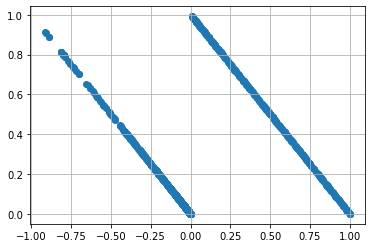

In [ ]:
plt.grid()
fitted = MLP_ZEROLAYER.predict(train)
resid = y_train.reshape(-1,1)-fitted
plt.scatter(resid,fitted)

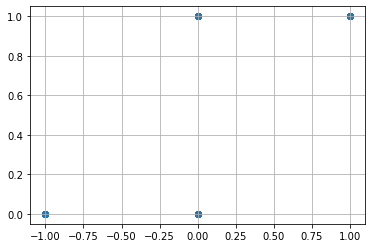

In [ ]:
plt.grid()
resid2 = pd.DataFrame(resid).round()
plt.scatter(resid2,y_train.reshape(-1,1))

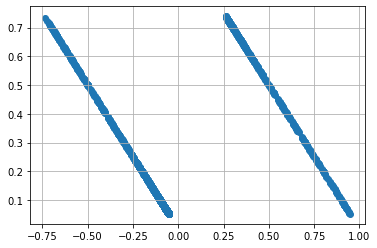

In [ ]:
plt.grid()
fitted = MLP2_TWOLAYER.predict(train)
resid = y_train.reshape(-1,1)-fitted
plt.scatter(resid,fitted)

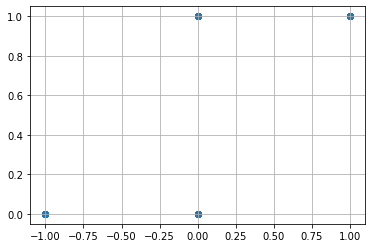

In [ ]:
plt.grid()
resid2 = pd.DataFrame(resid).round()
plt.scatter(resid2,y_train.reshape(-1,1))